In [52]:
# imports
import pickle
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

##%matplotlib inline
from ipywidgets import *

from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# if cloning repo and running on jupyter, only need to run this cell
# load dataset using pickle

datapath = os.path.join(
    os.getcwd(), "datasets", "Monkey Datasets", "co_feats20.pkl"
)  # run this line if in jupyter/cloned repo
print(datapath)
# datapath = os.path.join(os.getcwd(),'Monkey_Datasets', 'co_feats32.pkl') # run this line if colab
# datapath = "datasets\Monkey Datasets"
with open(datapath, "rb") as f:
    data = pickle.load(f)
# quick lil dataframe to make it visual
dfs = []
for key in data.keys():
    dfs.append(pd.DataFrame(data[key]))
dfs = pd.concat(dfs, axis=1, keys=data.keys())
dfs

/home/matcha/Sync/Code/EFRI/datasets/Monkey Datasets/co_feats20.pkl


FileNotFoundError: [Errno 2] No such file or directory: '/home/matcha/Sync/Code/EFRI/datasets/Monkey Datasets/co_feats20.pkl'

In [176]:
# group center out movements and show average trajectory, as well as corresponding neural data?
reachpositions = np.unique(data["targetPosition"], axis=0)

print(reachpositions)
reachpositions_interested = np.vstack((reachpositions[2, :], reachpositions[6, :]))

print(reachpositions_interested)

[[0.2 0.2]
 [0.2 0.5]
 [0.2 0.8]
 [0.5 0.2]
 [0.5 0.5]
 [0.5 0.8]
 [0.8 0.2]
 [0.8 0.5]
 [0.8 0.8]]
[[0.2 0.8]
 [0.8 0.2]]


In [170]:
grouped = {"neural": [], "behavior": []}
for position in reachpositions_interested:

    # get all trials for this target positions
    trials = np.unique(
        data["trialNumber"][
            np.argwhere((data["targetPosition"] == position).all(axis=1))
        ]
    )
    lens = np.stack([np.sum(data["trialNumber"] == trial) for trial in trials])

    # we need to align our trials since they are usually different lengths.
    # There are better ways to do this (time warping, etc.), but here we'll just truncate to the shortest trial of the group
    behavior = np.zeros((len(lens), np.min(lens), 6))
    neural = np.zeros((len(lens), np.min(lens), 96))
    for i, trial in enumerate(trials):
        behavior[i, :, :] = data["behavior"][(data["trialNumber"] == trial)[:, 0], :][
            0 : np.min(lens), :
        ]
        neural[i, :, :] = data["neural"][(data["trialNumber"] == trial)[:, 0], :][
            0 : np.min(lens), :
        ]

    grouped["behavior"].append(behavior)
    grouped["neural"].append(neural)


def plotSingleNeuronResponses(channel=0):
    fig, ax = plt.subplots(1, 2, figsize=(9, 4))

    for i, position in enumerate(reachpositions):
        mean_behavior = np.mean(grouped["behavior"][i], axis=0)
        mean_neural = np.mean(grouped["neural"][i], axis=0)

        ax[0].plot(mean_behavior[:, 0], mean_behavior[:, 1], label=position)
        ax[1].plot(mean_neural[:, channel])

    ax[0].set(
        title="Average Movement Trajectory",
        xlabel="Index Position",
        ylabel="MRP Position",
    )
    ax[1].set(ylabel="Average SBP", xlabel="Time (binsize)", title=f"Channel {channel}")
    plt.show()

In [171]:
print(grouped["neural"][1].shape)
neural_stacked_first = np.concatenate(grouped["neural"][0], axis=0)
neural_stacked_second = np.concatenate(grouped["neural"][1], axis=0)
print(neural_stacked_first.shape)
print(neural_stacked_second.shape)
first_end = neural_stacked_first.shape[0]
print(first_end)
neural_stacked = np.concatenate((neural_stacked_first, neural_stacked_second), axis=0)
print(neural_stacked.shape)

(82, 54, 96)
(5883, 96)
(4428, 96)
5883
(10311, 96)


In [2]:
import pandas as pd

In [4]:
parsed_data = pd.read_pickle("output_df.pkl")

In [8]:
parsed_data

,behavior,neural,targetPosition,trialNumber
0,"[[0.5153846, 0.4724014, 0.0, -0.0011111498, 0....","[[9.75, 23.75, 14.333333333333334, 11.44444444...","[0.2, 0.8]",3
1,"[[0.50747865, 0.49677426, 0.00021368265, 2.980...","[[12.083333333333334, 22.77777777777778, 11.19...","[0.2, 0.8]",13
2,"[[0.5442308, 0.4548387, -0.00057691336, 0.0, 0...","[[11.775, 29.125, 17.15, 13.725, 6.75, 7.675, ...","[0.2, 0.8]",45
3,"[[0.47653842, 0.5017742, 0.00038462877, -0.000...","[[11.15, 25.65, 15.2, 14.675, 7.6, 5.375, 14.5...","[0.2, 0.8]",55
4,"[[0.46132475, 0.48028672, -0.00017094612, -0.0...","[[9.194444444444445, 24.47222222222222, 14.166...","[0.2, 0.8]",57
...,...,...,...,...
188,"[[0.48076922, 0.4937097, 0.0, -0.00016131997, ...","[[10.025, 24.95, 10.05, 11.875, 6.675, 8.55, 1...","[0.8, 0.2]",1456
189,"[[0.46111107, 0.503405, 0.0004273355, -0.00017...","[[10.36111111111111, 20.166666666666668, 9.0, ...","[0.8, 0.2]",1464
190,"[[0.5307693, 0.5196774, -0.00096154213, -0.000...","[[8.975, 18.375, 11.8, 9.7, 5.225, 6.575, 11.9...","[0.8, 0.2]",1492
191,"[[0.540171, 0.5410395, 0.000790596, -0.0008780...","[[8.972222222222221, 22.77777777777778, 12.138...","[0.8, 0.2]",1504


In [30]:
import numpy as np

reachpositions_interested = [
    np.array([0.2, 0.8]),
    np.array([0.8, 0.2])
]

In [42]:
reachpositions_interested[0][0]
reachpositions_interested[1][0]

0.8

In [50]:
arr = []

counter = 0
final_count = 0


for row in parsed_data.iterrows():
    if row[1]["targetPosition"][0] == np.float32(0.8):
        final_count = counter
    for i in row[1]["neural"]:
        arr.append(i)
        if final_count == 0:
            counter = counter + 1


numpy_arr = np.array(arr)


print(numpy_arr.shape)

print(final_count)

(13855, 96)
7922


In [53]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [55]:
pca = PCA(n_components=2)
input_pca = pca.fit_transform(numpy_arr)
print(input_pca.shape)
input_pca_first = input_pca[:7922, :]
input_pca_second = input_pca[7922:, :]
pca_vector = pca.components_[0]

(13855, 2)


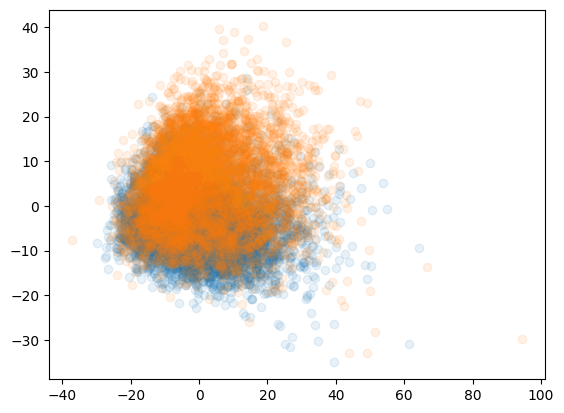

In [56]:
# fig = plt.figure(figsize=(12, 12))
# ax = fig.add_subplot(projection='3d')
plt.scatter(input_pca_first[:, 0], input_pca_first[:, 1], alpha=0.1)
plt.scatter(input_pca_second[:, 0], input_pca_second[:, 1], alpha=0.1)
# ax.scatter(input_pca_first[:,0],input_pca_first[:,1],input_pca_first[:,2])
# ax.scatter(input_pca_second[:,0],input_pca_second[:,1],input_pca_second[:,2])


# Show plot
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

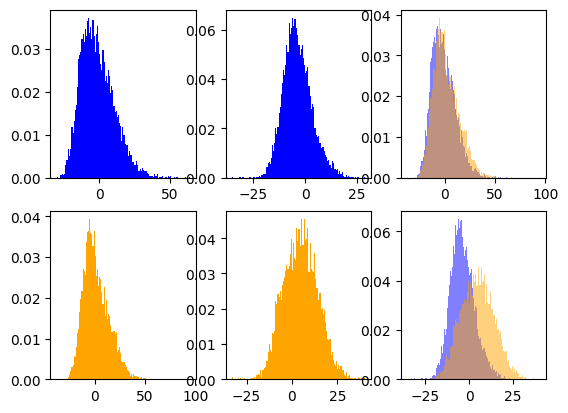

In [57]:
fig, ax = plt.subplots(2, 3)
ax[0, 0].hist(input_pca_first[:, 0], density=True, bins=120, color="Blue")
ax[1, 0].hist(input_pca_second[:, 0], density=True, bins=120, color="Orange")
ax[0, 1].hist(input_pca_first[:, 1], density=True, bins=120, color="Blue")
ax[1, 1].hist(input_pca_second[:, 1], density=True, bins=120, color="Orange")

ax[0, 2].hist(input_pca_first[:, 0], density=True, bins=120, color="Blue", alpha=0.5)
ax[0, 2].hist(input_pca_second[:, 0], density=True, bins=120, color="Orange", alpha=0.5)
ax[1, 2].hist(input_pca_first[:, 1], density=True, bins=120, color="Blue", alpha=0.5)
ax[1, 2].hist(input_pca_second[:, 1], density=True, bins=120, color="Orange", alpha=0.5)

plt.show